In [34]:
import pandas as pd

df = pd.read_csv('/Users/gorazdfilipovski/PycharmProjects/VNP/data/aud_data/aud_4_and_5/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [36]:
import seaborn as sns

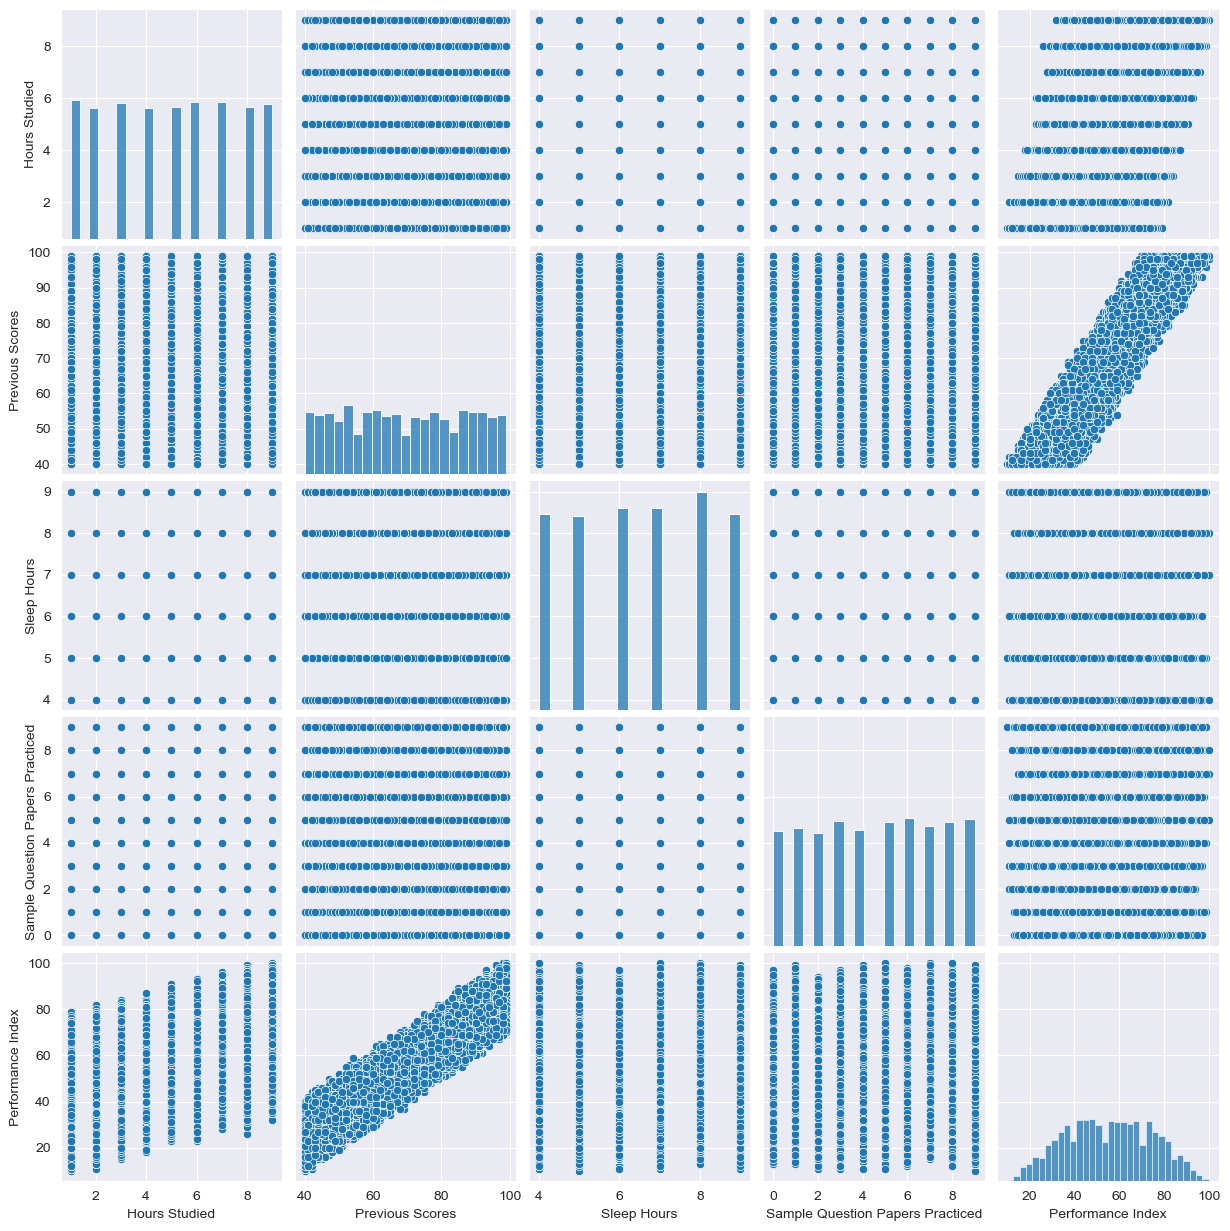

In [37]:
sns.pairplot(df)

In [38]:
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
3671,6,55,No,7,7,45.0
3697,1,74,Yes,8,4,48.0
9706,4,51,Yes,7,4,32.0
1983,6,58,Yes,8,1,49.0
9841,5,49,Yes,7,0,31.0


In [39]:
df.groupby("Extracurricular Activities").size()

Extracurricular Activities
No     5052
Yes    4948
dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Yes No --> {Yes:1,No:0} --> trans: changes into the list
df['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])

In [41]:
target = 'Performance Index'
X=df.drop([target],axis=1)
Y = df[target]

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Extracurricular Activities'}>,
        <Axes: title={'center': 'Sleep Hours'}>],
       [<Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: >]], dtype=object)

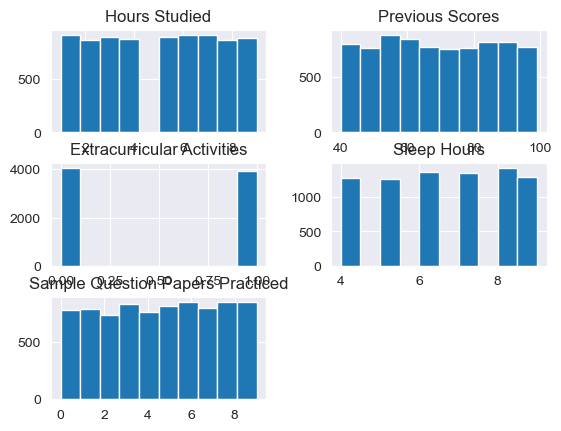

In [44]:
X_train.hist()

In [45]:
model.fit(X_train,Y_train)

LinearRegression()

In [46]:

model.coef_

array([2.85352109, 1.01959723, 0.59483017, 0.48314352, 0.1977199 ])

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(Y_test,y_pred)

0.9890954655668953

In [49]:
mean_squared_error(Y_test,y_pred)


4.07027859165258

In [57]:
target = 'Hours Studied'
X= df.drop([target],axis=1)
Y= df[target]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [58]:
X

,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,99,1,9,1,91.0
1,82,0,4,2,65.0
2,51,1,7,2,45.0
3,52,1,5,2,36.0
4,75,0,8,5,66.0
...,...,...,...,...,...
9995,49,1,4,2,23.0
9996,64,1,8,5,58.0
9997,83,1,8,5,74.0
9998,97,1,7,0,95.0


In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)

/Users/gorazdfilipovski/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = model.predict(X_test)


In [61]:
from sklearn.metrics import f1_score,classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.44      0.70      0.54       230
           2       0.20      0.10      0.13       208
           3       0.24      0.21      0.22       233
           4       0.22      0.28      0.24       189
           5       0.29      0.26      0.27       231
           6       0.31      0.28      0.29       229
           7       0.35      0.40      0.37       213
           8       0.44      0.38      0.41       240
           9       0.66      0.70      0.68       227

    accuracy                           0.37      2000
   macro avg       0.35      0.37      0.35      2000
weighted avg       0.36      0.37      0.36      2000



In [63]:
f1_score(Y_test,y_pred,average='macro')

0.35237980422434134

In [64]:
f1_score(Y_test,y_pred,average='micro')

0.37

In [65]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [66]:
model.fit(X_train,Y_train)


KNeighborsClassifier()

In [67]:
y_pred = model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.70      0.67       230
           2       0.39      0.43      0.41       208
           3       0.45      0.40      0.42       233
           4       0.37      0.39      0.38       189
           5       0.47      0.47      0.47       231
           6       0.42      0.38      0.40       229
           7       0.40      0.46      0.43       213
           8       0.46      0.41      0.44       240
           9       0.71      0.67      0.69       227

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000



In [74]:
X_train

,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6504,59,0,4,6,41.0
3382,53,1,5,5,45.0
1375,42,0,4,7,18.0
3711,90,0,4,6,63.0
5979,54,0,9,7,45.0
...,...,...,...,...,...
530,52,1,7,8,29.0
8892,93,0,6,1,81.0
4657,47,0,9,8,36.0
5829,99,1,9,8,82.0


In [79]:
f1_scores = []
for i in range(3,100):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(Y_test,y_pred,average='macro'))

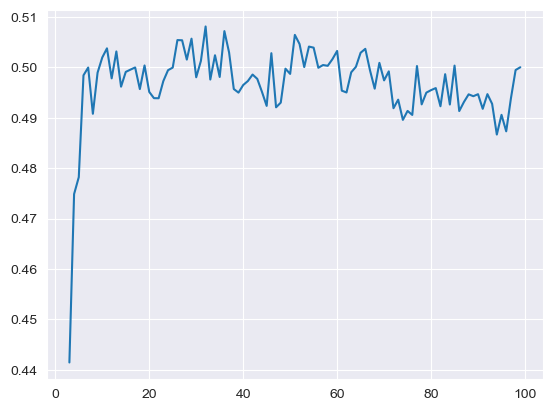

In [81]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(3,100)],f1_scores)